In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from pandas import datetime

In [0]:
dateparse = lambda dates: pd.datetime.strptime(dates,'%b-%y')

In [3]:
data1 = pd.read_csv('USCarrier_Traffic_20200528005921.csv',parse_dates=['Period'],index_col = 'Period',date_parser=dateparse)
data1.head(6)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


,Total
Period,
2000-01-01,49045412
2000-02-01,49306303
2000-03-01,60443541
2000-04-01,58286680
2000-05-01,60533783
2000-06-01,64903295


In [4]:
data2 = data1['Total']
data2.head()

Period
2000-01-01    49045412
2000-02-01    49306303
2000-03-01    60443541
2000-04-01    58286680
2000-05-01    60533783
Name: Total, dtype: int64

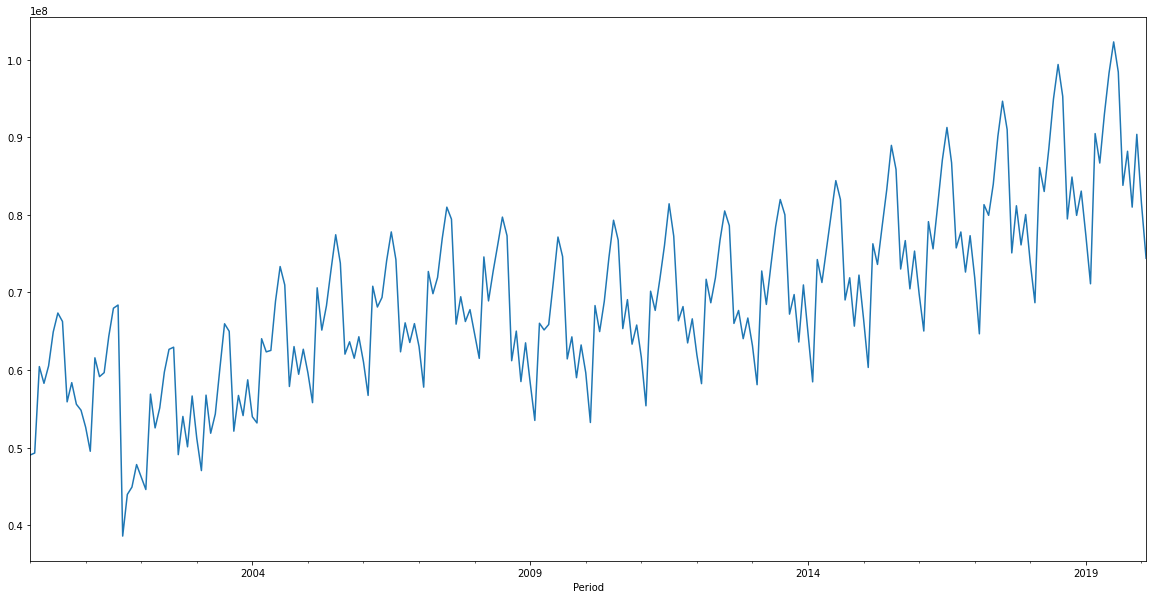

In [5]:
data2.plot(kind = 'line',figsize = (20,10))
plt.show()
# Looking at the data it shows seasonal variation

In [6]:
data1.shape

(242, 1)

In [0]:
# total 242 months data is available which means 20 yrs
# 16 yrs train data and 4 yrs test data

train=data2[0:192] 
test=data2[192:]


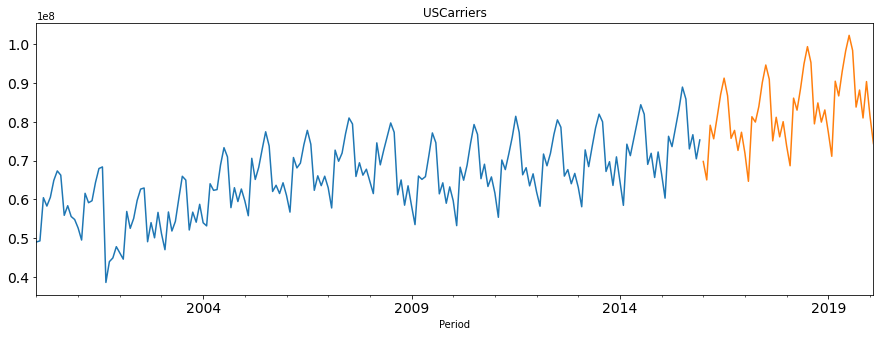

In [8]:
train.plot(figsize=(15,5), title= 'USCarriers', fontsize=14)
test.plot(figsize=(15,5), title= 'USCarriers', fontsize=14)
plt.show()

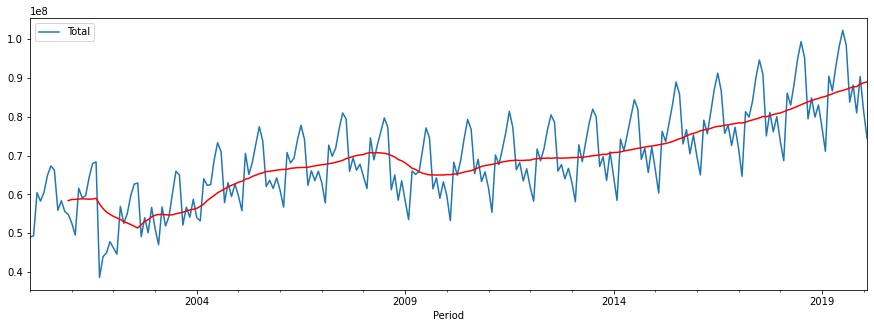

In [9]:
#moving_avg = pd.rolling_mean(time1,12)

moving_avg =data2.rolling(12).mean()
data1.plot(kind="line",figsize=(15,5))
moving_avg.plot(kind="line",figsize=(15,5),color='red')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


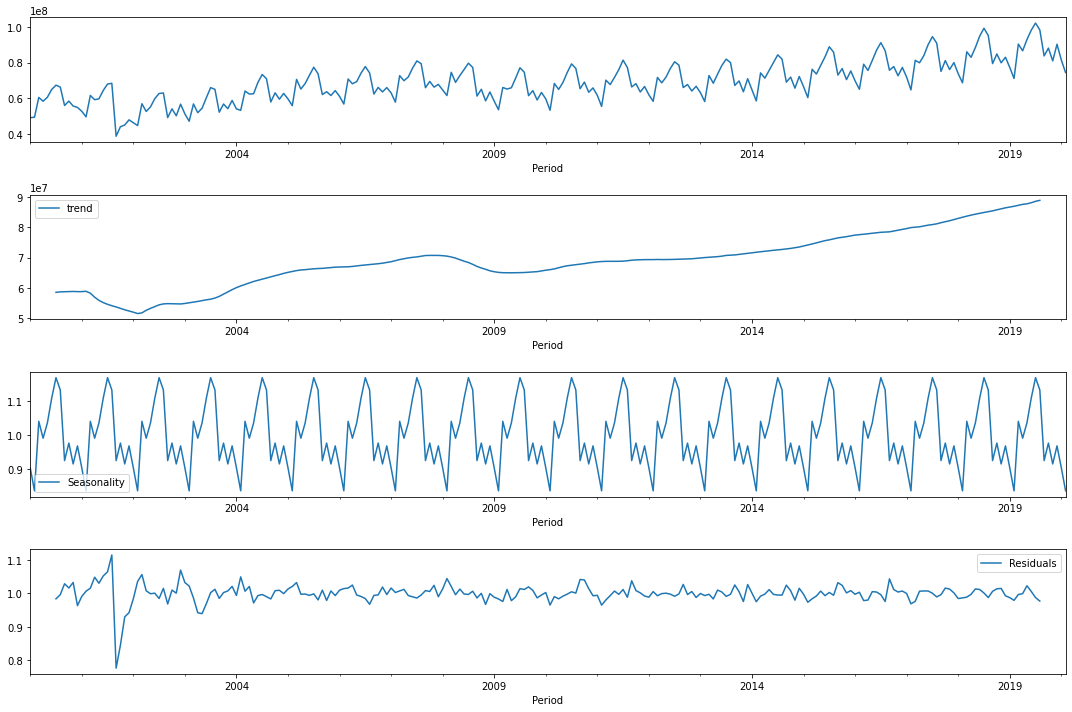

In [10]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(data2,model='multiplicative', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
data2.plot(kind="line",figsize=(15,10),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(15,10),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(15,10),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(15,10),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


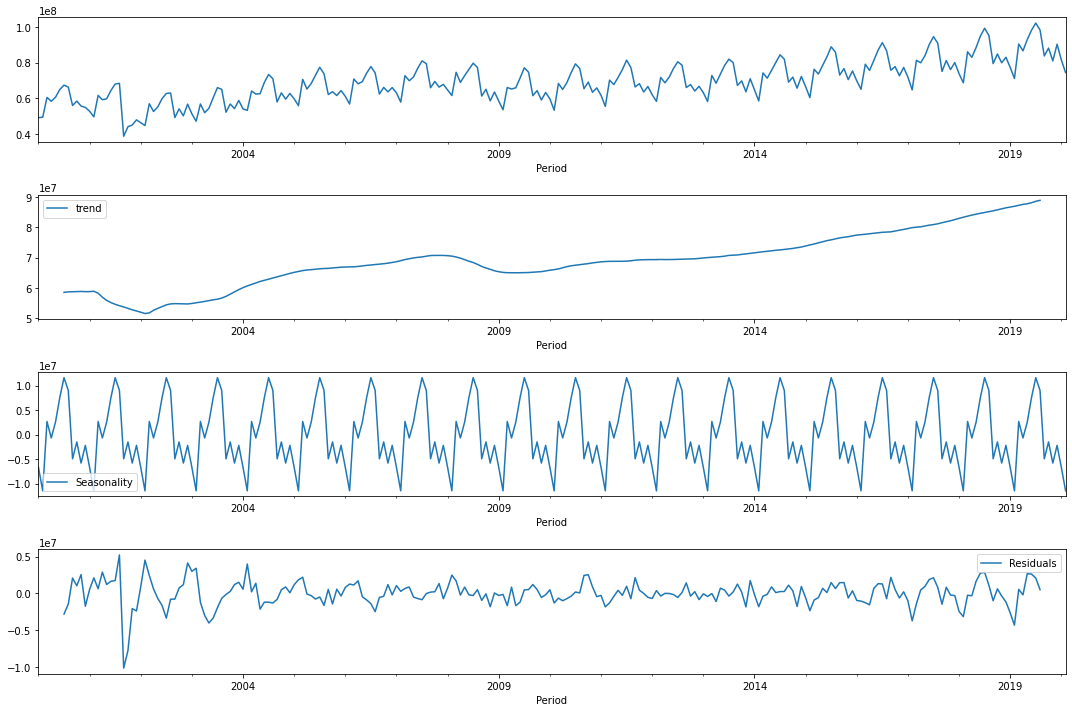

In [11]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(data2,model='additive', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
data2.plot(kind="line",figsize=(15,10),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(15,10),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(15,10),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(15,10),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [12]:
trend

Period
2000-01-01   NaN
2000-02-01   NaN
2000-03-01   NaN
2000-04-01   NaN
2000-05-01   NaN
              ..
2019-10-01   NaN
2019-11-01   NaN
2019-12-01   NaN
2020-01-01   NaN
2020-02-01   NaN
Name: trend, Length: 242, dtype: float64

In [13]:
seasonal

Period
2000-01-01   -6.696044e+06
2000-02-01   -1.148651e+07
2000-03-01    2.668899e+06
2000-04-01   -6.926288e+05
2000-05-01    2.541127e+06
                  ...     
2019-10-01   -1.508976e+06
2019-11-01   -5.816595e+06
2019-12-01   -2.211773e+06
2020-01-01   -6.696044e+06
2020-02-01   -1.148651e+07
Name: seasonal, Length: 242, dtype: float64

In [14]:
residual

Period
2000-01-01   NaN
2000-02-01   NaN
2000-03-01   NaN
2000-04-01   NaN
2000-05-01   NaN
              ..
2019-10-01   NaN
2019-11-01   NaN
2019-12-01   NaN
2020-01-01   NaN
2020-02-01   NaN
Name: resid, Length: 242, dtype: float64

In [0]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [16]:
train = train.astype('double')
ses = SimpleExpSmoothing(train).fit()
ses1 = ses.forecast(48)
ses.summary()

/root/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Dep. Variable:,endog,No. Observations:,192
Model:,SimpleExpSmoothing,SSE,8167583724499318.000
Optimized:,True,AIC,6029.239
Trend:,None,BIC,6035.754
Seasonal:,None,AICC,6029.453
Seasonal Periods:,None,Date:,"Wed, 10 Jun 2020"
Box-Cox:,False,Time:,18:27:48
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7086484,alpha,True
initial_level,4.9045e+07,l.0,True


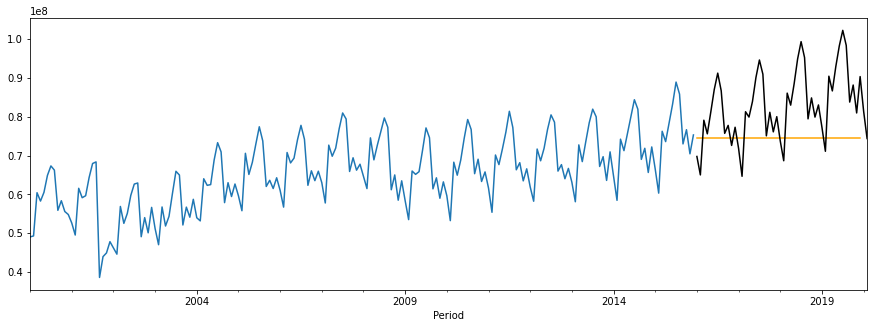

In [17]:
train.plot(kind="line",figsize=(15,5))
ses1.plot(kind="line",figsize=(15,5),color='orange')
test.plot(kind="line",figsize=(15,5),color='black')
plt.show()

In [18]:
hes = ExponentialSmoothing(train , trend='add').fit()
hes.summary()

/root/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/root/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Dep. Variable:,endog,No. Observations:,192
Model:,ExponentialSmoothing,SSE,8172649175906386.000
Optimized:,True,AIC,6033.358
Trend:,Additive,BIC,6046.388
Seasonal:,None,AICC,6033.812
Seasonal Periods:,None,Date:,"Wed, 10 Jun 2020"
Box-Cox:,False,Time:,18:27:49
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6842105,alpha,True
smoothing_slope,0.0001,beta,True


In [0]:
hes1 = hes.forecast(48)

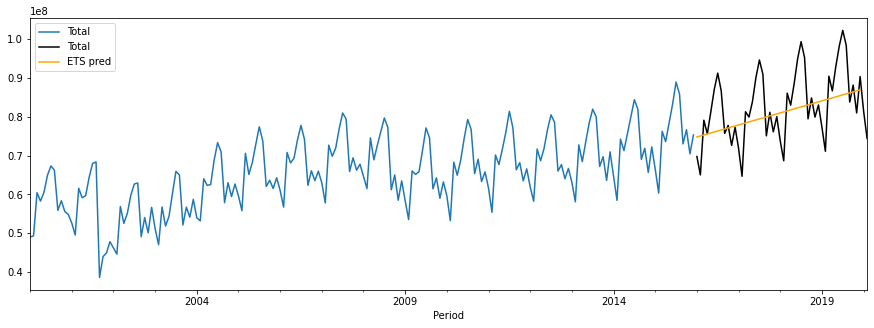

In [20]:
train.plot(kind="line",figsize=(15,5),legend=True)
test.plot(kind="line",figsize=(15,5),legend=True, color='black')
hes1.plot(kind="line",figsize=(15,5),color='orange',legend=True,label='ETS pred')

In [21]:
hwes = ExponentialSmoothing(train,seasonal_periods=12 ,trend='add',seasonal="multiplicative",).fit()
hwes.summary()

/root/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Dep. Variable:,endog,No. Observations:,192
Model:,ExponentialSmoothing,SSE,642986976304442.000
Optimized:,True,AIC,5569.213
Trend:,Additive,BIC,5621.333
Seasonal:,Multiplicative,AICC,5573.167
Seasonal Periods:,12,Date:,"Wed, 10 Jun 2020"
Box-Cox:,False,Time:,18:27:49
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6503051,alpha,True
smoothing_slope,0.0013157,beta,True


In [0]:
hwes1 = hwes.forecast(48)

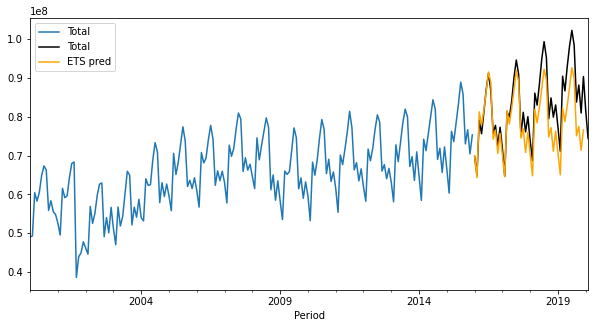

In [23]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hwes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [0]:
import numpy as np
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolmean= pd.core.window.Rolling(timeseries, window=12).mean()
    rolstd = pd.core.window.Rolling(timeseries, window=12).std()
    #rolmean = timeseries.rolling(12).mean()
    #rolstd  = timeseries.rolling(12).std()
    

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

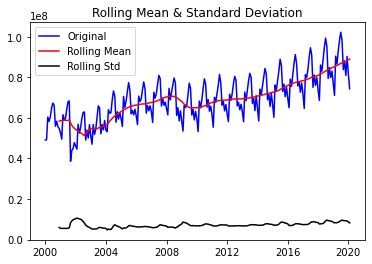

Results of Dickey-Fuller Test:
Test Statistic                   0.223216
p-value                          0.973534
#Lags Used                      13.000000
Number of Observations Used    228.000000
Critical Value (1%)             -3.459361
Critical Value (5%)             -2.874302
Critical Value (10%)            -2.573571
dtype: float64


In [25]:
test_stationarity(data2)

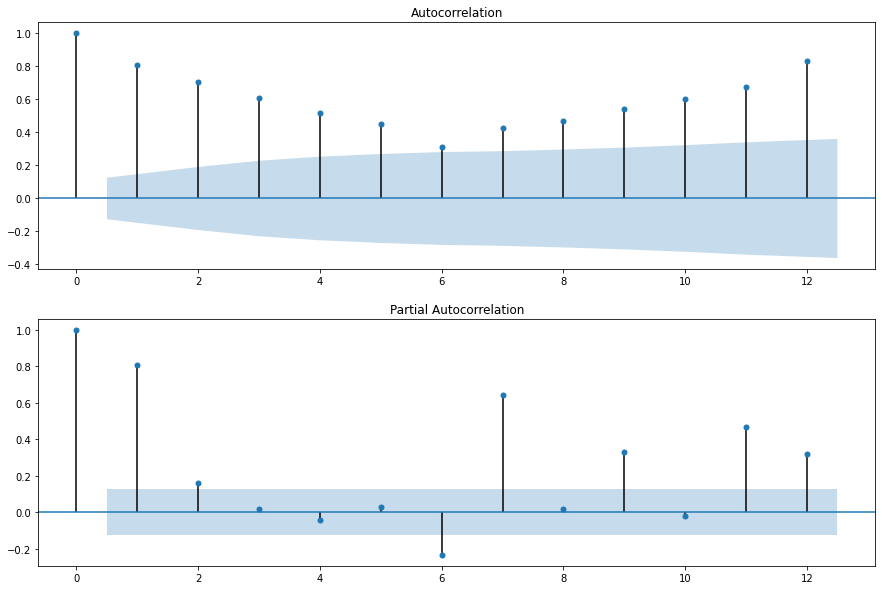

In [26]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(data2, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(data2, ax=pyplot.gca(),lags=12)
pyplot.show()

In [0]:
diff1=train.diff()
diff1=diff1.dropna()

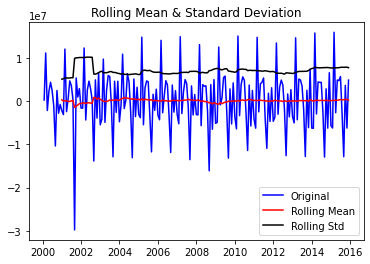

Results of Dickey-Fuller Test:
Test Statistic                  -3.502967
p-value                          0.007911
#Lags Used                      12.000000
Number of Observations Used    178.000000
Critical Value (1%)             -3.467632
Critical Value (5%)             -2.877918
Critical Value (10%)            -2.575501
dtype: float64


In [28]:
test_stationarity(diff1)

In [0]:
from statsmodels.tsa.stattools import acf, pacf

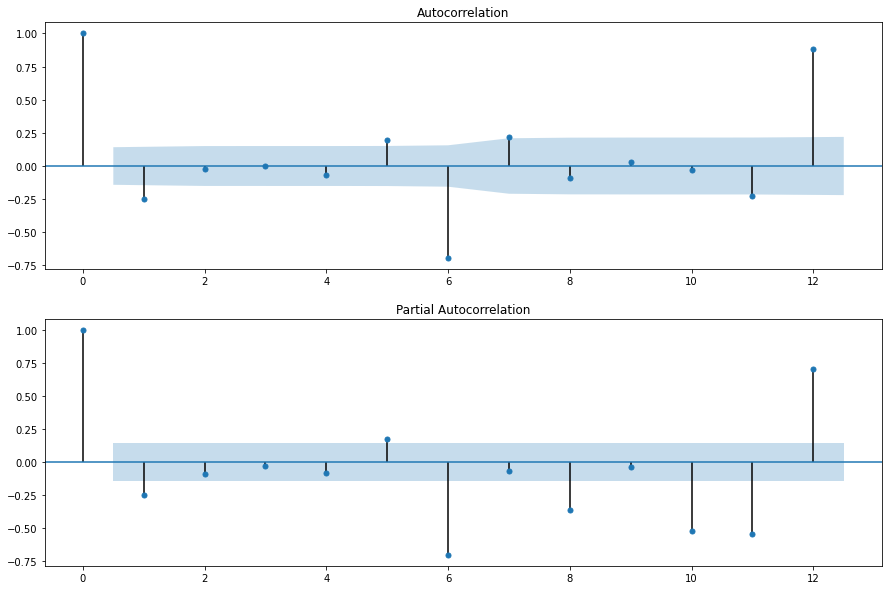

In [30]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diff1, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(diff1, ax=pyplot.gca(),lags=12)
pyplot.show()

In [31]:
! pip install --user pmdarima

In [32]:
!pip install pmdarima 

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=5792.146, BIC=5808.083, Time=1.905 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=5791.705, BIC=5798.079, Time=0.041 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=5791.295, BIC=5804.044, Time=0.464 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=5790.580, BIC=5803.329, Time=0.589 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=5790.155, BIC=5793.343, Time=0.032 seconds
Fit ARIMA(0,1,0)x(1,1,0,12) [intercept=True]; AIC=5789.961, BIC=5799.523, Time=0.629 seconds
Fit ARIMA(0,1,0)x(2,1,0,12) [intercept=True]; AIC=5790.330, BIC=5803.080, Time=0.833 seconds
Fit ARIMA(0,1,0)x(1,1,1,12) [intercept=True]; AIC=5782.292, BIC=5795.041, Time=0.933 seconds
Fit ARIMA(0,1,0)x(0,1,1,12) [intercept=True]; AIC=5789.466, BIC=5799.028, Time=0.429 seconds
Fit ARIMA(0,1,0)x(2,1,1,12) [intercept=True]; AIC=5783.547, BIC=5799.484, Time=2.610 seconds
Fit ARIMA(0,1,0)x(1,1,2,12

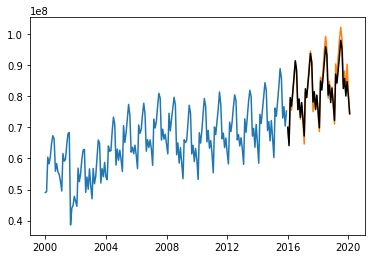

In [33]:
from pmdarima import auto_arima
model = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True
                          )
model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [34]:
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  192
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -2887.146
Date:                              Wed, 10 Jun 2020   AIC                           5782.292
Time:                                      18:28:21   BIC                           5795.041
Sample:                                           0   HQIC                          5787.462
                                              - 192                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2763.7207   7.02e+04     -0.039      0.969    -1.4e+05    1.35e+05
ar.S.L12       0.58

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [36]:
model = ARIMA(train, order=(0,1,0))
model_fit=model.fit(disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Total   No. Observations:                  191
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3275.543
Method:                           css   S.D. of innovations        6786861.276
Date:                Wed, 10 Jun 2020   AIC                           6555.085
Time:                        18:28:22   BIC                           6561.590
Sample:                    02-01-2000   HQIC                          6557.720
                         - 12-01-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.376e+05   4.91e+05      0.280      0.779   -8.25e+05     1.1e+06


/root/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/root/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


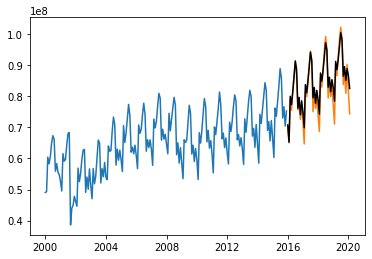

In [49]:
forecast = model_fit.forecast(steps = 50)[0]

forecast = pd.DataFrame(forecast,index = test.index,columns=['Total'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

2020-02-01    8.253675e+07
2020-03-01    9.500747e+07
2020-04-01    9.237984e+07
2020-05-01    9.547588e+07
2020-06-01    9.967208e+07
2020-07-01    1.038336e+08
2020-08-01    1.016911e+08
2020-09-01    9.005482e+07
2020-10-01    9.308642e+07
2020-11-01    8.889594e+07
2020-12-01    9.249341e+07
2021-01-01    9.057058e+07
2021-02-01    8.651577e+07
Freq: MS, dtype: float64


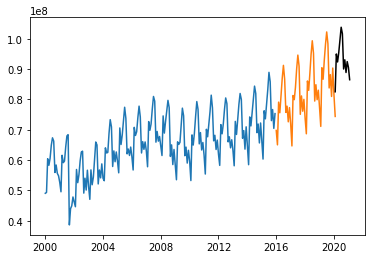

In [59]:
#Forecast of next 12 months
forecast = model_fit.forecast(steps = 62)
print(forecast[49:])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast[49:], label='Prediction', color='black')
plt.show()

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

7317790.183769584


In [0]:
import statsmodels.api as sm

In [0]:
diffs1=train.diff()
diffs1=diffs1.dropna()

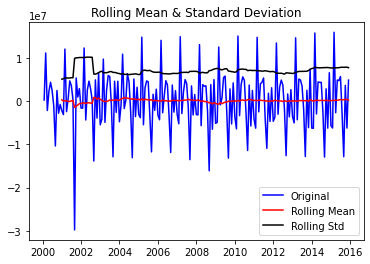

Results of Dickey-Fuller Test:
Test Statistic                  -3.502967
p-value                          0.007911
#Lags Used                      12.000000
Number of Observations Used    178.000000
Critical Value (1%)             -3.467632
Critical Value (5%)             -2.877918
Critical Value (10%)            -2.575501
dtype: float64


In [42]:
test_stationarity(diffs1)

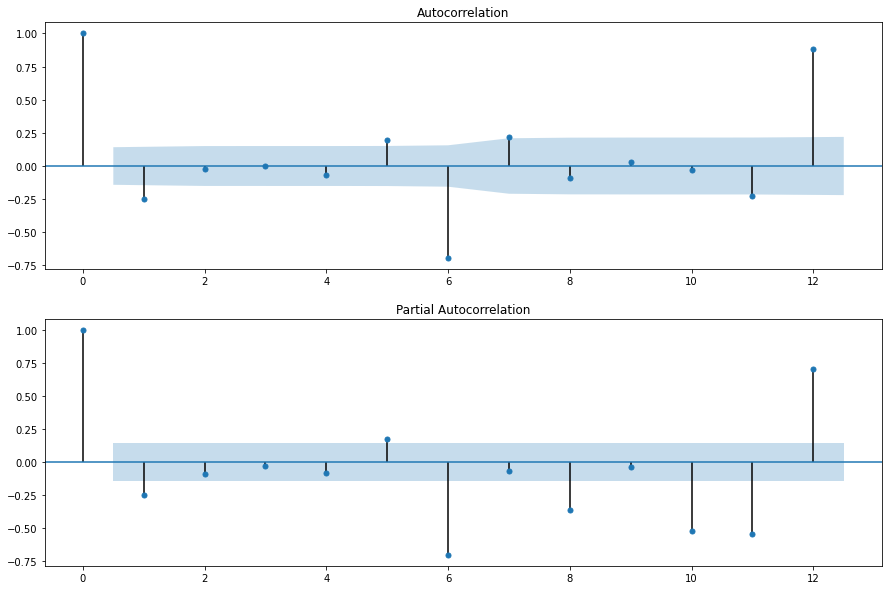

In [43]:
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diffs1, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(diffs1, ax=pyplot.gca(),lags=12)
pyplot.show()

In [44]:
train.shape

(192,)

In [45]:
model = sm.tsa.SARIMAX(train, order=(0,1,0), seasonal_order=(1,1,1,12))

/root/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/root/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [46]:
model_fit=model.fit(disp=True)
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Total   No. Observations:                  192
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -2888.362
Date:                              Wed, 10 Jun 2020   AIC                           5782.723
Time:                                      18:28:25   BIC                           5792.285
Sample:                                  01-01-2000   HQIC                          5786.601
                                       - 12-01-2015                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.7412      0.028     26.138      0.000       0.686       0.797
ma.S.L12      -1.00

/root/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2020-02-01    8.253675e+07
2020-03-01    9.500747e+07
2020-04-01    9.237984e+07
2020-05-01    9.547588e+07
2020-06-01    9.967208e+07
2020-07-01    1.038336e+08
2020-08-01    1.016911e+08
2020-09-01    9.005482e+07
2020-10-01    9.308642e+07
2020-11-01    8.889594e+07
2020-12-01    9.249341e+07
2021-01-01    9.057058e+07
2021-02-01    8.651577e+07
Freq: MS, dtype: float64


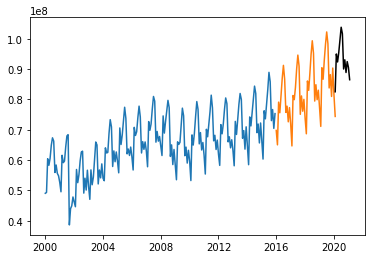

In [61]:
forecast = model_fit.forecast(steps=62)
print(forecast[49:])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast[49:], label='Prediction', color='black')
plt.show()

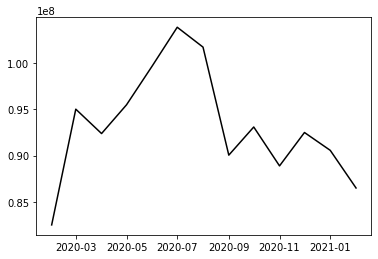

In [62]:


plt.plot(forecast[49:], label='Prediction', color='black')
plt.show()

In [48]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

2170130.7380315424
